<font size=40 color='red'>TEST CASES</font>



A number of tests based on actuall observations. Error calculations

_software by Grzegorz Wiktorowicz (gwiktoro@gmail.com)_

In [1]:
# change path to the folder where orbitlib.py is located (not needed if it's the current workign directory)
# %cd /content/drive/MyDrive/work/Oliver
import orbitlib as ol

import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from collections import defaultdict
import pandas as pd

from importlib import reload  # TESTING

# Setting up the Solar System

In [2]:
# Orbital parameters for Solar System planets
#
# Source: Source: Standish and Williams (1992) through https://farside.ph.utexas.edu/teaching/celestial/Celestialhtml/node34.html
#
# Units a:AU, e:[0,1], I:deg, Omega:deg, omega:deg, L:deg
# Epoch J2000 (2000-1-1.5)

Solar_System_Keplerian_Elements = {
  "Mercury":dict(a=0.38709893, e=0.20563069, T=0.240846, I=7.00487, Omega=48.33167, omega_bar=77.45645, L=252.25084),
  "Venus":dict(a=0.72333199, e=0.00677323, T=0.615, I=3.39471, Omega=76.68069, omega_bar=131.53298, L=181.97973),
  "Earth":dict(a=1.00000011, e=0.01671022, T=1, I=0.00005, Omega=0, omega_bar=102.94719, L=100.46435),
  "Mars":dict(a=1.52366231, e=0.09341233, T=1.881, I=1.85061, Omega=49.57854, omega_bar=336.04084, L=355.45332),
  "Jupiter":dict(a=5.20336301, e=0.04839266, T=11.86, I=1.30530, Omega=100.55615, omega_bar=14.75385, L=34.40438),
  "Saturn":dict(a=9.53707032, e=0.05415060, T=29.46, I=2.48446, Omega=113.71504, omega_bar=92.43194, L=49.94432),
  "Uranus":dict(a=19.19126393, e=0.04716771, T=84.01, I=0.76986, Omega=74.22988, omega_bar=170.96424, L=313.23218),
  "Neptune":dict(a=30.06896348, e=0.00858587, T=164.8, I=1.76917, Omega=131.72169, omega_bar=44.97135, L=304.88003),
  "Pluto":dict(a=39.48168677, e=0.24880766, T=248.1, I=17.14175, Omega=110.30347, omega_bar=224.06676, L=238.92881)
}

solar_df = pd.DataFrame.from_dict(Solar_System_Keplerian_Elements, orient='index')

# converting units to SI and transforming L into tauHello
for col in ['I','Omega','omega_bar','L']:
  solar_df[col] *= 2 * np.pi / 360  # deg -> rad
solar_df['omega'] = solar_df['omega_bar'] - solar_df['Omega']
solar_df['T'] =  solar_df['T'].apply(lambda x: timedelta(days=365.25636 * x).total_seconds())  # sideral years -> sideral days
solar_df['M'] = solar_df['L'] - solar_df['omega_bar']  # mean anomaly at J2000

J2000 = datetime(2000,1,1,12,0,0).timestamp()  # seconds from "1970-1-1"
  
display(solar_df)

# dictionary with keys are Planet names and value as dictionary of orbital parameters 
solar_dict = solar_df.drop(['L', 'omega_bar'], 1).to_dict(orient='index')

,a,e,T,I,Omega,omega_bar,L,omega,M
Mercury,0.387099,0.205631,7.600654e+06,1.222580e-01,0.843547,1.351870,4.402608,0.508323,3.050738
Venus,0.723332,0.006773,1.940826e+07,5.924887e-02,1.338331,2.295684,3.176145,0.957353,0.880462
Earth,1.000000,0.016710,3.155815e+07,8.726646e-07,0.000000,1.796767,1.753434,1.796767,-0.043334
Mars,1.523662,0.093412,5.936088e+07,3.229924e-02,0.865309,5.865019,6.203831,4.999710,0.338812
Jupiter,5.203363,0.048393,3.742797e+08,2.278178e-02,1.755036,0.257503,0.600470,-1.497533,0.342966
Saturn,9.537070,0.054151,9.297031e+08,4.336201e-02,1.984702,1.613242,0.871693,-0.371460,-0.741549
Uranus,19.191264,0.047168,2.651200e+09,1.343659e-02,1.295556,2.983889,5.466933,1.688333,2.483044
Neptune,30.068963,0.008586,5.200783e+09,3.087784e-02,2.298977,0.784898,5.321160,-1.514079,4.536262
Pluto,39.481687,0.248808,7.829577e+09,2.991800e-01,1.925159,3.910703,4.170094,1.985544,0.259392


/usr/lib/python3/dist-packages/ipykernel_launcher.py:34: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


In [3]:
# Change rates of orbital paramters for Solar System planets
#
# Source https://ssd.jpl.nasa.gov/planets/approx_pos.html
#
# units au/Cy, rad/Cy, deg/Cy, deg/Cy, deg/Cy, deg/Cy

Solar_System_Rates = {
"Mercury": dict(a=0.00000037, e=0.00001906, I=-0.00594749, L=149472.67411175, omega_bar=0.16047689, Omega=-0.12534081),
"Venus":  dict(a=0.00000390, e=-0.00004107, I=-0.00078890, L=58517.81538729, omega_bar=0.00268329, Omega=-0.27769418),
"EM Bary": dict(a=0.00000562, e=-0.00004392, I=-0.01294668, L=35999.37244981, omega_bar=0.32327364, Omega=0.0),
"Mars": dict(a=0.00001847, e=0.00007882, I=-0.00813131, L=19140.30268499, omega_bar=0.44441088, Omega=-0.29257343),
"Jupiter": dict(a=-0.00011607, e=-0.00013253, I=-0.00183714, L=3034.74612775, omega_bar=0.21252668, Omega=0.20469106),
"Saturn": dict(a=-0.00125060, e=-0.00050991, I=0.00193609, L=1222.49362201, omega_bar=-0.41897216, Omega=-0.28867794),
"Uranus": dict(a=-0.00196176, e=-0.00004397, I=-0.00242939, L=428.48202785, omega_bar=0.40805281, Omega=0.04240589),
"Neptune": dict(a=0.00026291, e=0.00005105, I=0.00035372, L=218.45945325, omega_bar=-0.32241464, Omega=-0.00508664)
}

rates_df = pd.DataFrame.from_dict(Solar_System_Rates, orient='index')

for col in ['I','L','omega_bar','Omega']:
  rates_df[col] *= 2 * np.pi / 360  # deg -> rad
rates_df['omega'] = rates_df['omega_bar'] - rates_df['Omega']

# transformation from 1/Cy to 1/sec
year_in_sec = 31536000
rates_df /= 100 * year_in_sec
rates_dict = rates_df.drop(['L', 'omega_bar'], 1).to_dict(orient='index')

/usr/lib/python3/dist-packages/ipykernel_launcher.py:27: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


# TESTS

## Uranus positions from Flagstaff observatory

In [4]:
# Data Source: https://ssd.jpl.nasa.gov/dat/planets/ccd1_nofs.txt
# Flagstaff observatory

#            1 ..... Planet ID
#            2 ..... Satellite ID
#         3- 5 ..... UT  (yr,mon,day)
#         6- 8 ..... UTC (h,m,s)
#         9-11 ..... J2000 RA  (h,m,s)
#        12-14 ..... J2000 Dec (d,m,s)
#           15 ..... Geocentric parallax in RA  (arcsec)  [geo - topo positions]
#           16 ..... Geocentric parallax in Dec (arcsec)  [geo - topo positions]
#           17 ..... Observatory Code
#           18 ..... Type of Obs (topo/geoc)
#           19 ..... NOFS Telescope/Reference Catalog
#           20 ..... Proper Name
obs = pd.read_csv('ccd1_nofs.txt', 
            header = None, 
            delim_whitespace=True, 
            comment='#',
            names = ['Planet ID', "Satellite ID", 'yr','mon','day','h','m','s','RA_h','RA_m','RA_s',
                     'Dec_d','Dec_m','Dec_s','Geocentric parallax in RA  (arcsec)',
                     'Geocentric parallax in Dec (arcsec)','Observatory Code','Type of Obs (topo/geoc)',
                     'NOFS Telescope/Reference Catalog','Proper Name']
            )

obs['RA'] = (obs['RA_h'] + obs['RA_m']/60 + obs['RA_s']/3600) * np.pi / 12  # [rad]
obs['Dec'] = (np.abs(obs['Dec_d']) + obs['Dec_m'] / 60 + obs['Dec_s'] / 3600) * np.pi / 180 * (obs['Dec_d'])/np.abs(obs['Dec_d'])
obs['Time'] = pd.to_datetime(obs.apply(lambda row: f"{row['yr']} {row['mon']} {row['day']} {row['h']}:{row['m']}:{row['s']}", 1))


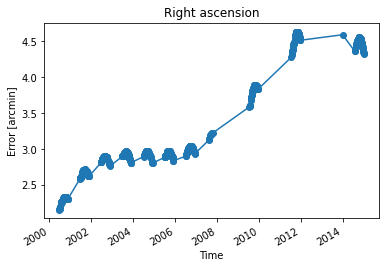

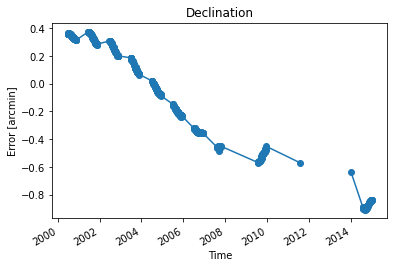

In [5]:
# Comparison between observational and simulations (orbitlib) sky positions (Rigth Ascension and Declination)
# error in arc minutes (Full Moon is 30 arc minutes)
# time is not continuous
reload(ol)

uranus = obs[(obs['Proper Name'] == 'Uranus') & (obs['Type of Obs (topo/geoc)'] == 'geoc')].copy()

system = ol.create_system(solar_dict, rates_dict, observer='Earth')

positions = ol.get_positions(system, time_index = uranus.Time)

sky_positions = ol.get_sky_positions({'Uranus':positions['Uranus']})['Uranus']

tmp = uranus.set_index('Time')
tmp['RA_sim'] = sky_positions.RA
tmp['DEC_sim'] = sky_positions.DEC
rad2arcmin = 360 * 60 / (2 * np.pi)

((tmp['RA'] - tmp['RA_sim']) * rad2arcmin).plot(marker='o')
plt.ylabel('Error [arcmin]')
plt.title("Right ascension")
plt.show()

((tmp['Dec'] - tmp['DEC_sim']) * rad2arcmin).plot(marker='o')
plt.ylabel('Error [arcmin]')
plt.title('Declination')
plt.show()

In [6]:
# Most of the observational data, esp. old, is in the form of the card format

def read_card_format(filename):
    data = []
    for line in open(filename, 'r').readlines():
        planet = line[1:4]
        JD = int(line[4:16]) / 1e5
        Time = pd.to_datetime(JD, unit='D', origin='julian')
        RA_h = int(line[33:35])
        RA_m = int(line[35:37])
        RA_s = int(line[37:42])/1e3
        RA = (RA_h + RA_m / 60 + RA_s / 3600) * np.pi / 12
        DEC_d_str = line[50:53]
        DEC_sign = -1 if '-' in DEC_d_str else 1
        DEC_d = int(DEC_d_str)
        DEC_m = int(line[53:55])
        DEC_s = int(line[55:59])/1e2
        
        # sign for declination is for the entire number, not only for the degree part
        DEC = (np.abs(DEC_d) + DEC_m / 60 + DEC_s / 3600) * np.pi / 180 * DEC_sign
        data.append({'planet':planet, 'Time':Time, 'RA':RA, 'DEC':DEC})
    
    return pd.DataFrame(data)


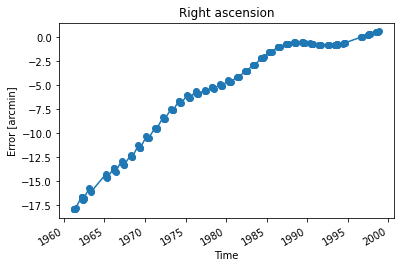

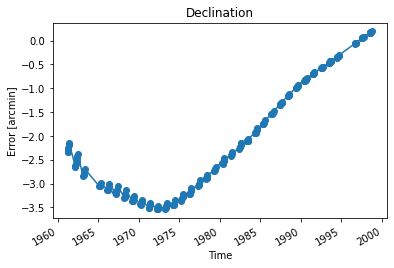

In [7]:
# TEST for NEPTUNE

# Reading data from Nikolaev Astronomical Observatory
# Available at https://ssd.jpl.nasa.gov/planets/obs_data.html
nikolaev = read_card_format('nikolaev.txt')

neptune = nikolaev.query('planet=="008"')  # 008 is the code for Neptune

system = ol.create_system(solar_dict, rates_dict, observer='Earth')

positions = ol.get_positions(system, time_index = neptune.Time)

sky_positions = ol.get_sky_positions({'Neptune':positions['Neptune']})['Neptune']

tmp = neptune.set_index('Time')
tmp['RA_sim'] = sky_positions.RA
tmp['DEC_sim'] = sky_positions.DEC
rad2arcmin = 360 * 60 / (2 * np.pi)

((tmp['RA'] - tmp['RA_sim']) * rad2arcmin).plot(marker='o')
plt.ylabel('Error [arcmin]')
plt.title("Right ascension")
plt.show()

((tmp['DEC'] - tmp['DEC_sim']) * rad2arcmin).plot(marker='o')
plt.ylabel('Error [arcmin]')
plt.title('Declination')
plt.show()

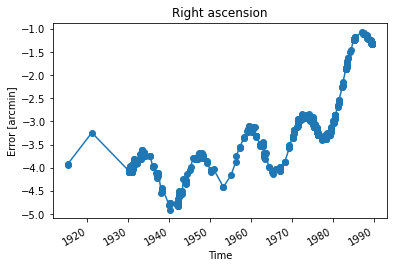

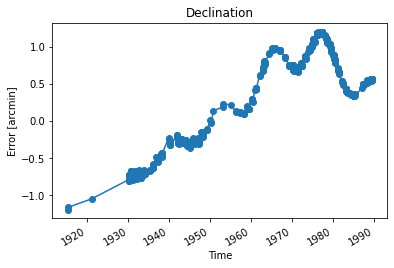

In [9]:
# TEST FOR PLUTO

# Loading data from miscelanous observatories 
# Available at https://ssd.jpl.nasa.gov/planets/obs_data.html
miscastrom = read_card_format('miscastrom.txt')

pluto = miscastrom.query('planet=="900"')  # Pluto code here is '900'

system = ol.create_system(solar_dict, rates_dict, observer='Earth')

positions = ol.get_positions(system, time_index = pluto.Time)

sky_positions = ol.get_sky_positions({'Pluto':positions['Pluto']})['Pluto']

tmp = pluto.set_index('Time')
tmp['RA_sim'] = sky_positions.RA
tmp['DEC_sim'] = sky_positions.DEC
rad2arcmin = 360 * 60 / (2 * np.pi)

((tmp['RA'] - tmp['RA_sim']) * rad2arcmin).plot(marker='o')
plt.ylabel('Error [arcmin]')
plt.title("Right ascension")
plt.show()

((tmp['DEC'] - tmp['DEC_sim']) * rad2arcmin).plot(marker='o')
plt.ylabel('Error [arcmin]')
plt.title('Declination')
plt.show()

The errors are within several arcminutes and are in general smaller near the reference date of 2000-01-01